In [1]:
import pandas as pd

In [2]:
df_sales = pd.read_csv('../Data/SalesData.csv', delimiter=',', header='infer', encoding='latin-1')

In [3]:
df_sales.head(5)

,Date,Month,Quarter,Year,Qty,Product,Category,Cust.Name,Comp.Name,Pharmacy,Area Code,Code,Location
0,1-11-2015,11,Q4,2015,2,Injection 14,Skinbooster,Customer 1,Company 1,Pharmacy 1,NW3,NW,London
1,1-11-2015,11,Q4,2015,1,Injection 14,Skinbooster,Customer 1,Company 1,Pharmacy 1,NW3,NW,London
2,1-11-2015,11,Q4,2015,1,Injection 1,Dermafiller,NaN,NaN,Pharmacy 2,HA8,HA,Outside London M25
3,1-11-2015,11,Q4,2015,1,Injection 2,Dermafiller,NaN,NaN,Pharmacy 2,HA8,HA,Outside London M25
4,1-11-2015,11,Q4,2015,4,Injection 14,Skinbooster,NaN,NaN,Pharmacy 2,PE21,PE,"NorthEast, Midlands"


Changing the Quarter column from Q1 to 1, Q2 to 2, Q3 to 3 and Q4 to 4

In [4]:
df_sales['Quarter'].replace(to_replace = "Q1", 
                 value = 1, 
                  inplace = True)
df_sales['Quarter'].replace(to_replace = "Q2", 
                 value = 2, 
                  inplace = True)
df_sales['Quarter'].replace(to_replace = "Q3", 
                 value = 3, 
                  inplace = True)
df_sales['Quarter'].replace(to_replace = "Q4", 
                 value = 4, 
                  inplace = True)

In [5]:
print(df_sales['Quarter'].unique())

[4 1 2 3]


Drop columns: Cust.Name, Comp.Name, Area Code and Code

In [6]:
df_sales.drop('Cust.Name', axis=1, inplace=True)
df_sales.drop('Comp.Name', axis=1, inplace=True)
df_sales.drop('Area Code', axis=1, inplace=True)
df_sales.drop('Code', axis=1, inplace=True)

In [7]:
df_sales.head()

,Date,Month,Quarter,Year,Qty,Product,Category,Pharmacy,Location
0,1-11-2015,11,4,2015,2,Injection 14,Skinbooster,Pharmacy 1,London
1,1-11-2015,11,4,2015,1,Injection 14,Skinbooster,Pharmacy 1,London
2,1-11-2015,11,4,2015,1,Injection 1,Dermafiller,Pharmacy 2,Outside London M25
3,1-11-2015,11,4,2015,1,Injection 2,Dermafiller,Pharmacy 2,Outside London M25
4,1-11-2015,11,4,2015,4,Injection 14,Skinbooster,Pharmacy 2,"NorthEast, Midlands"


Remove negative quantities

In [8]:
df_sales['Qty'].unique()

array([  2,   1,   4,   8,   3,  10,   5,   6,  15,   7,  18,  40,  16,
        12,  13,   9,  30,  20,  24,  50,  60, 100,  17,  21,  -6,  11,
        14,  -5,  28,  52,  26,  80,  19,  -3,  32,  -2,  38,   0,  25,
        70,  64, 140,  56,  27,  33,  35,  31,  75,  36,  68,  -8,  65,
        34,  92,  78,  -1,  83,  55, 110, -12,  22, -24,  41,  48,  84,
        53,  49,  69,  23,  42,  47,  29,  39, 150,  72,  51,  37,  59,
        45,  99,  -4,  58, -10,  44,  46, 136,  74,  61,  67,  73, 102,
       227,  66,  54,  85, 120,  43,  63,  57, 144, 200,  76,  77, 210,
       -17,  -9, 114,  82, -14,  81, -35,  96,  97, 105, -16,  90, 300,
       157, 400, 245, 121,  86, 280, 750, 152,  87, 115], dtype=int64)

In [9]:
df_sales.query('Qty > 0', inplace=True)

In [10]:
df_sales['Qty'].unique()

array([  2,   1,   4,   8,   3,  10,   5,   6,  15,   7,  18,  40,  16,
        12,  13,   9,  30,  20,  24,  50,  60, 100,  17,  21,  11,  14,
        28,  52,  26,  80,  19,  32,  38,  25,  70,  64, 140,  56,  27,
        33,  35,  31,  75,  36,  68,  65,  34,  92,  78,  83,  55, 110,
        22,  41,  48,  84,  53,  49,  69,  23,  42,  47,  29,  39, 150,
        72,  51,  37,  59,  45,  99,  58,  44,  46, 136,  74,  61,  67,
        73, 102, 227,  66,  54,  85, 120,  43,  63,  57, 144, 200,  76,
        77, 210, 114,  82,  81,  96,  97, 105,  90, 300, 157, 400, 245,
       121,  86, 280, 750, 152,  87, 115], dtype=int64)

Tutorial 1 https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns  

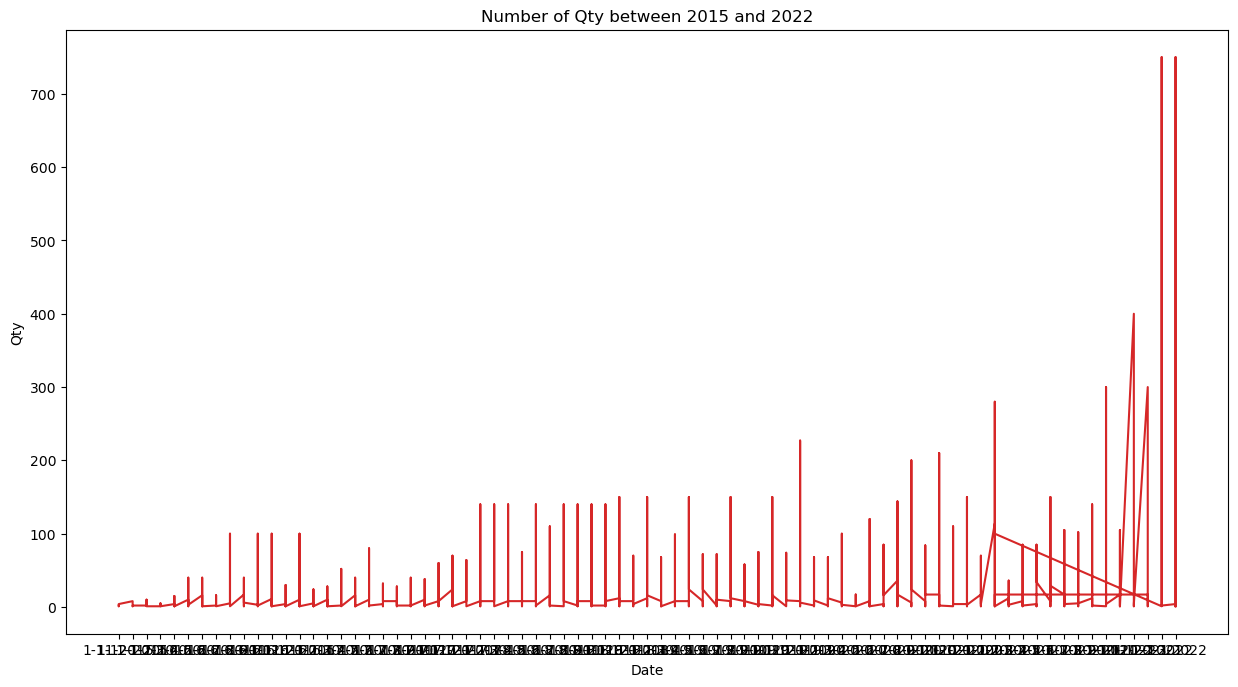

In [12]:
def plot_df(df_sales, x, y, title="", xlabel='Date', ylabel='Qty', dpi=100):
    plt.figure(figsize=(15,8), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df_sales, x=df_sales['Date'], y=df_sales['Qty'], title='Number of Qty between 2015 and 2022')

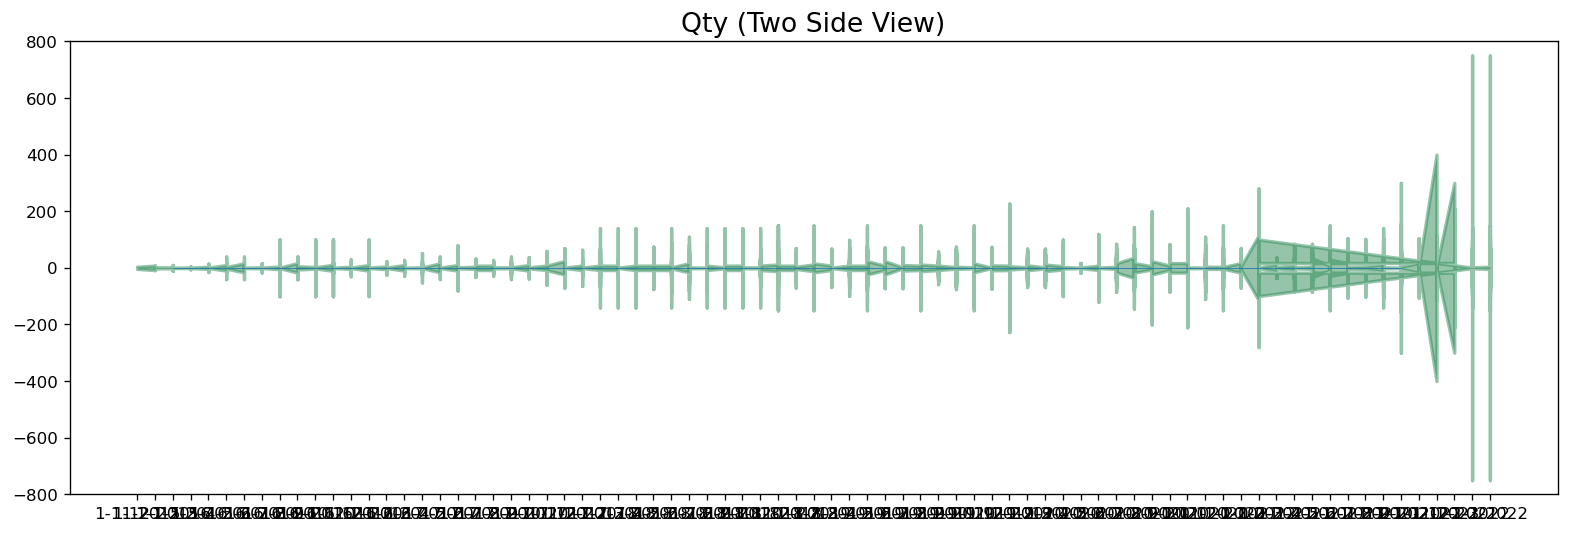

In [13]:
x = df_sales['Date'].values
y1 = df_sales['Qty'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Qty (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df_sales['Date']), xmax=np.max(df_sales['Date']), linewidth=.5)
plt.show()

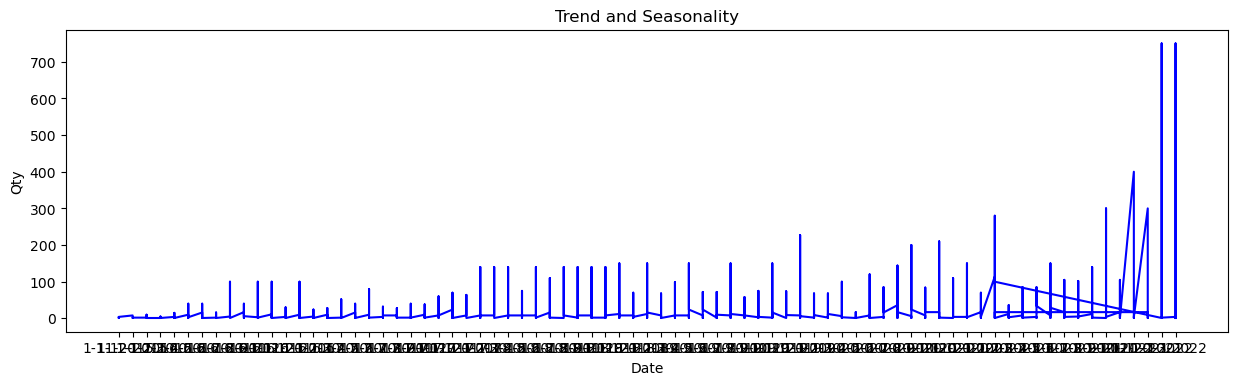

In [14]:
def plot_df(df_sales, x, y, title="", xlabel='Date', ylabel='Qty', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df_sales, x=df_sales['Date'], y=df_sales['Qty'], title='Trend and Seasonality')

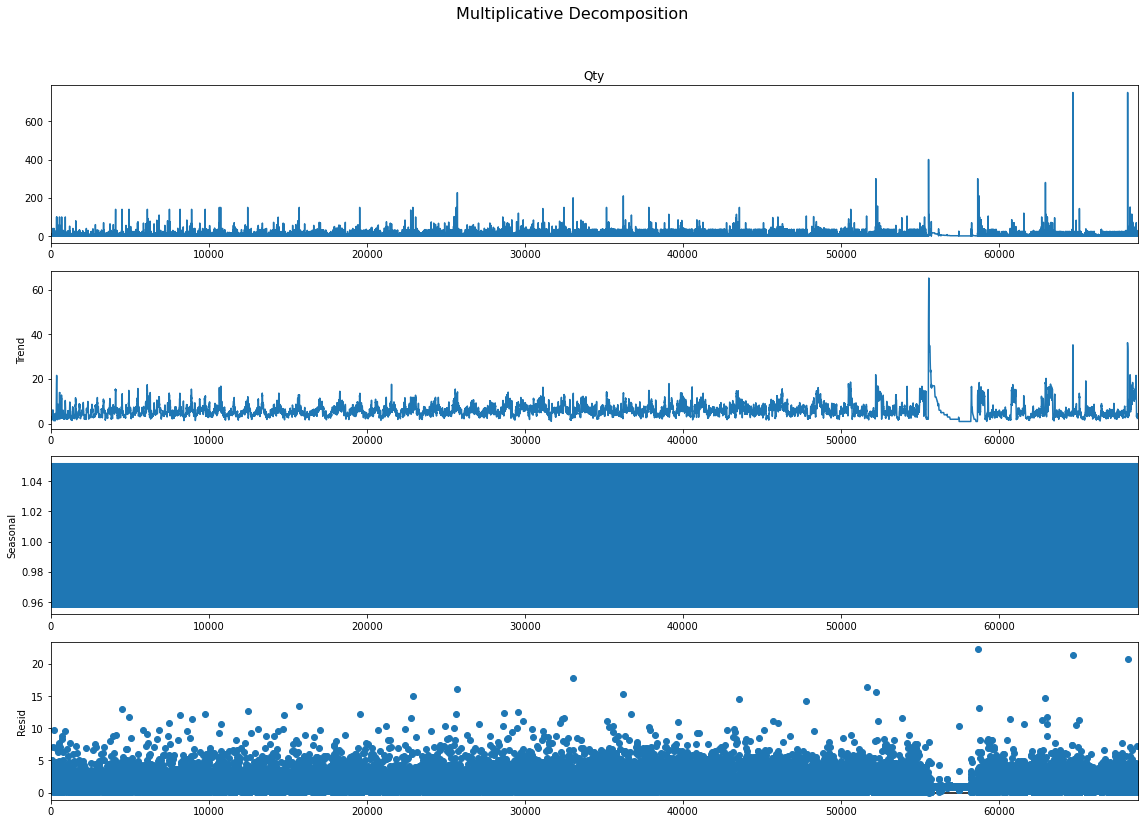

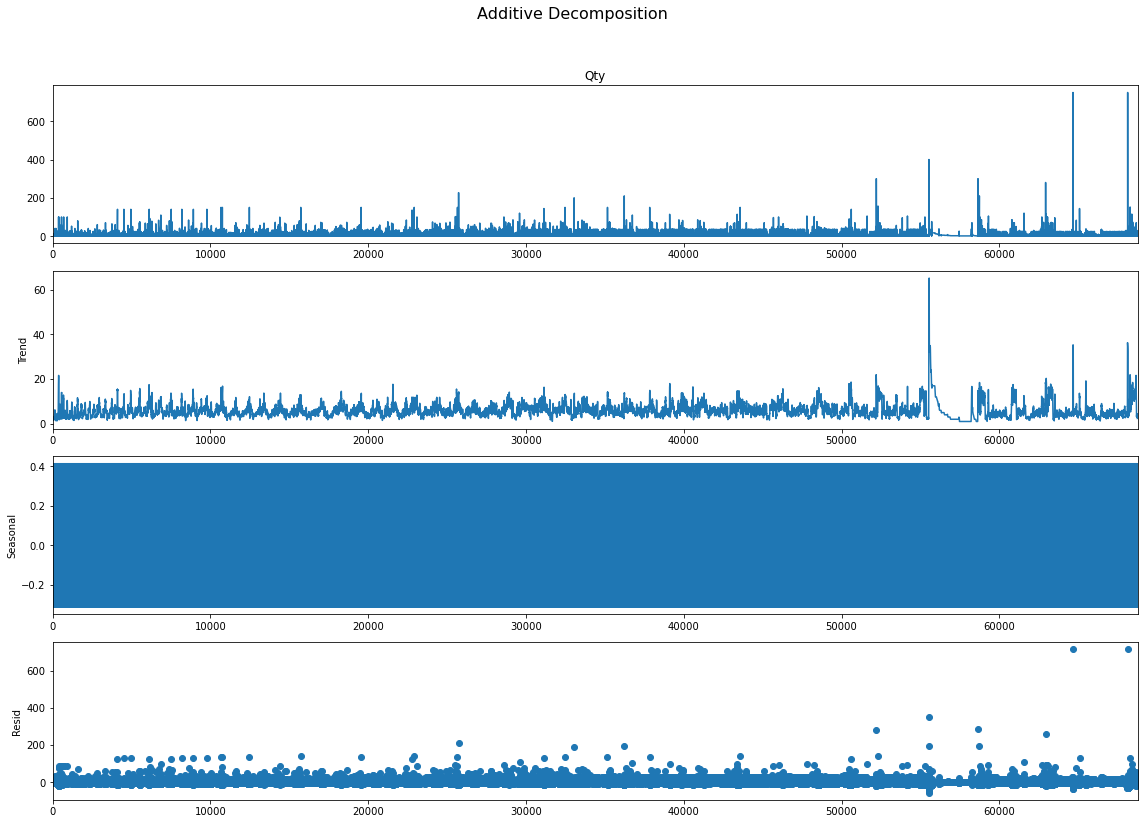

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df_sales['Qty'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df_sales['Qty'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

<AxesSubplot:title={'center':'Random White Noise'}>

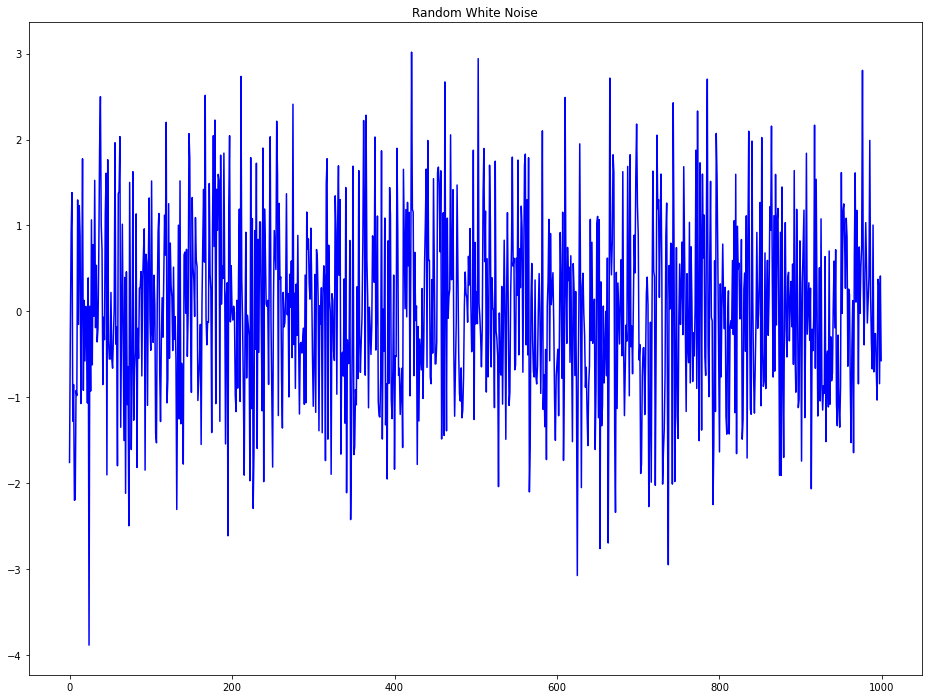

In [16]:
rand_numbers = np.random.randn(1000)
pd.Series(rand_numbers).plot(title='Random White Noise', color='b')

Text(0.5, 1.0, 'Qty detrended by subtracting the least squares fit')

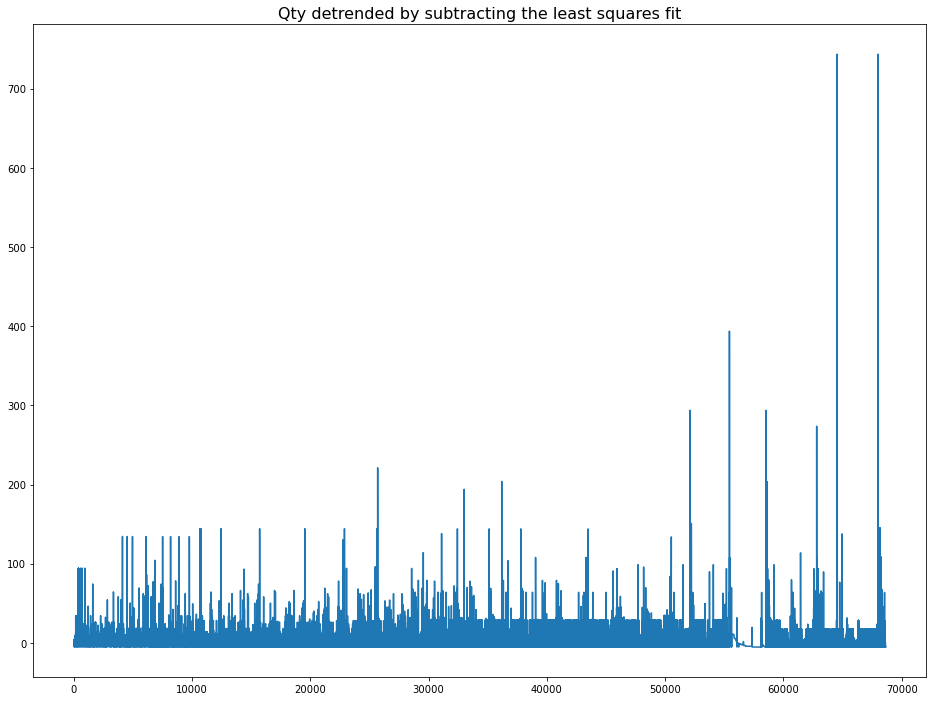

In [17]:
from scipy import signal
detrended = signal.detrend(df_sales['Qty'].values)
plt.plot(detrended)
plt.title('Qty detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Qty detrended by subtracting the trend component')

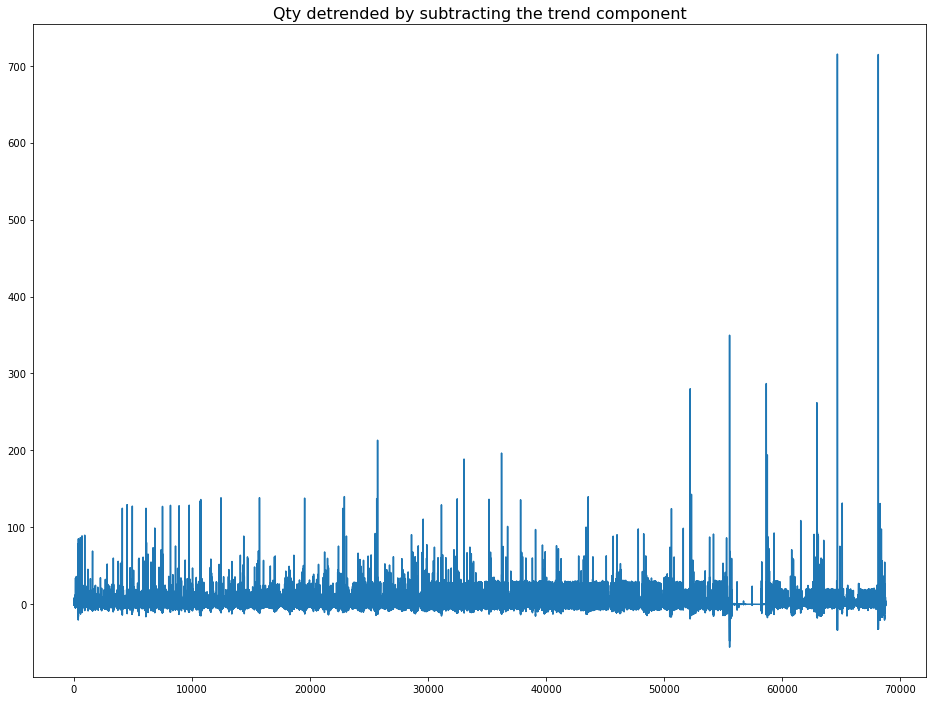

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df_sales['Qty'], model='multiplicative', period=30)
detrended = df_sales['Qty'].values - result_mul.trend
plt.plot(detrended)
plt.title('Qty detrended by subtracting the trend component', fontsize=16)

[]

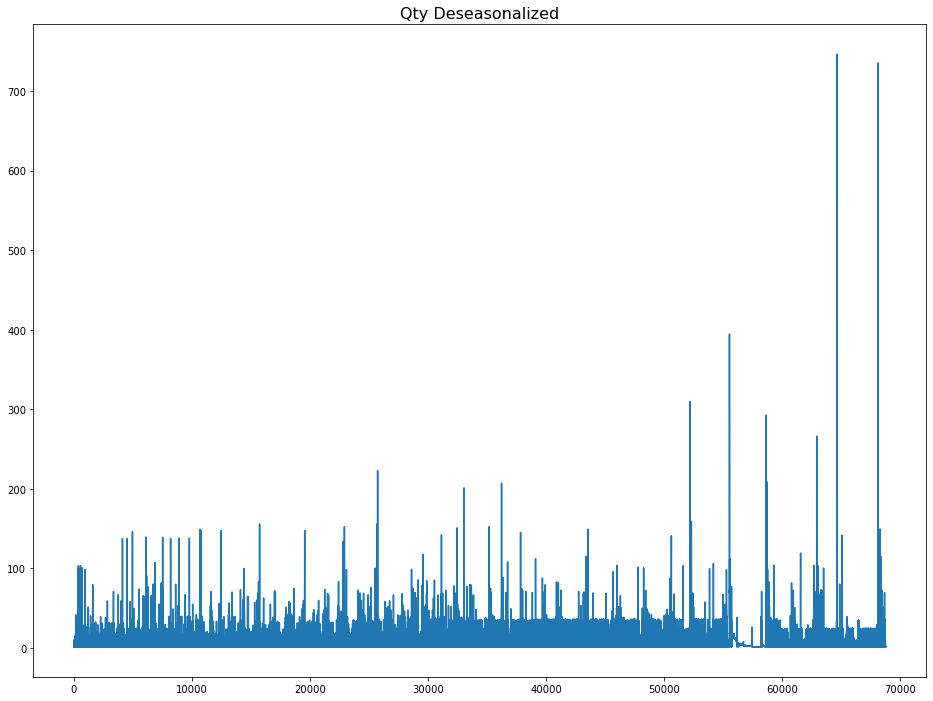

In [19]:
# Subtracting the Trend Component


# Time Series Decomposition
result_mul = seasonal_decompose(df_sales['Qty'], model='multiplicative', period=30)


# Deseasonalize
deseasonalized = df_sales['Qty'].values / result_mul.seasonal


# Plot
plt.plot(deseasonalized)
plt.title('Qty Deseasonalized', fontsize=16)
plt.plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

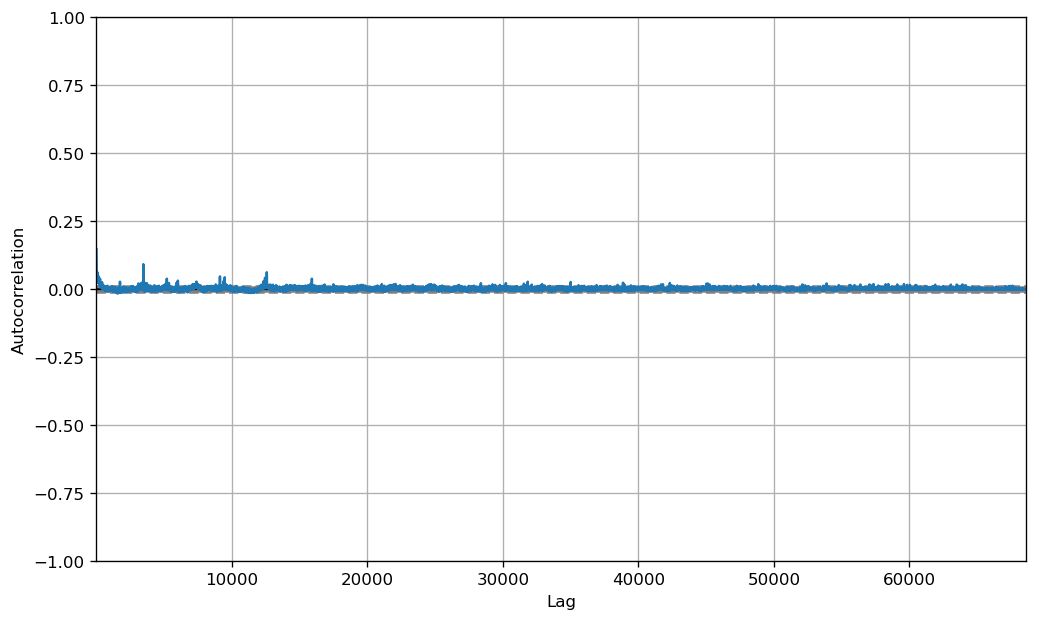

In [20]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(df_sales['Qty'].tolist())

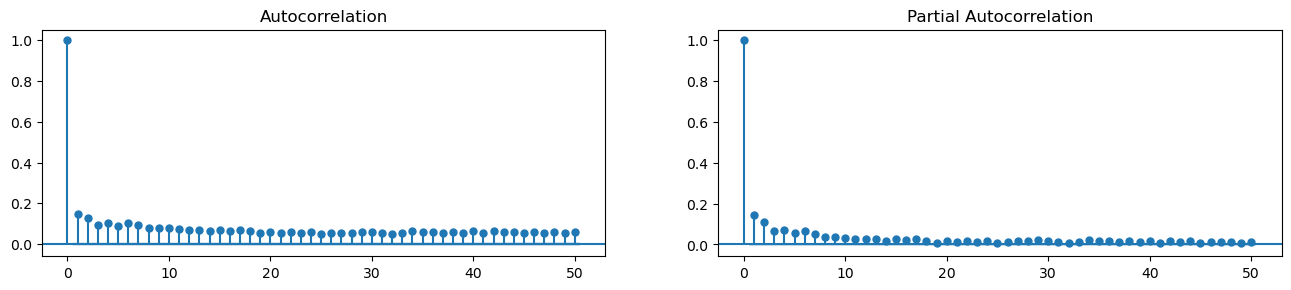

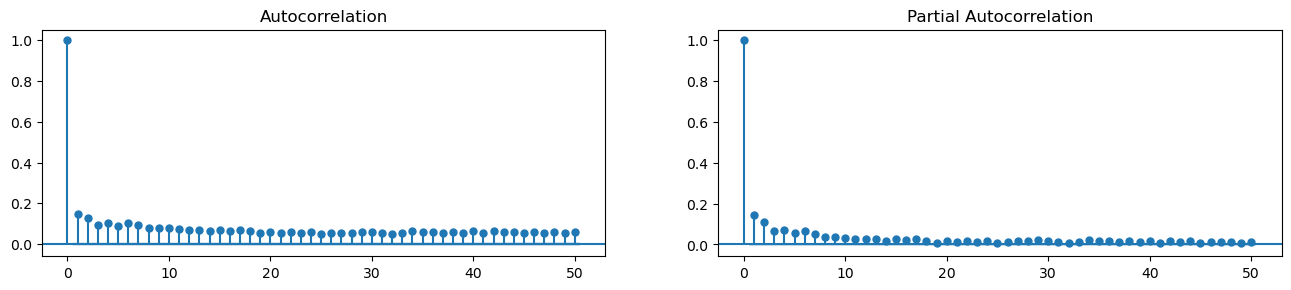

In [21]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df_sales['Qty'].tolist(), lags=50, ax=axes[0])
plot_pacf(df_sales['Qty'].tolist(), lags=50, ax=axes[1])

Tutorial https://www.kaggle.com/code/satishgunjal/tutorial-time-series-analysis-and-forecasting 

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pylab import rcParams

In [23]:
# Set plot size 
rcParams['figure.figsize'] = 10, 6

In [24]:
df = df_sales[['Date', 'Qty']]

In [25]:
df.head()

,Date,Qty
0,1-11-2015,2
1,1-11-2015,1
2,1-11-2015,1
3,1-11-2015,1
4,1-11-2015,4


In [26]:
df['Date'] = pd.to_datetime(df.Date)
df = df.set_index(df.Date)
df.drop('Date', axis = 1, inplace = True)
print('Column datatypes= \n',df.dtypes)
df

Column datatypes= 
 Qty    int64
dtype: object


C:\Users\galea\AppData\Local\Temp/ipykernel_3904/204390979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df.Date)


,Qty
Date,
2015-01-11,2
2015-01-11,1
2015-01-11,1
2015-01-11,1
2015-01-11,4
...,...
2022-01-03,2
2022-01-03,1
2022-01-03,1


Text(0.5, 1.0, 'Trend of the Time Series')

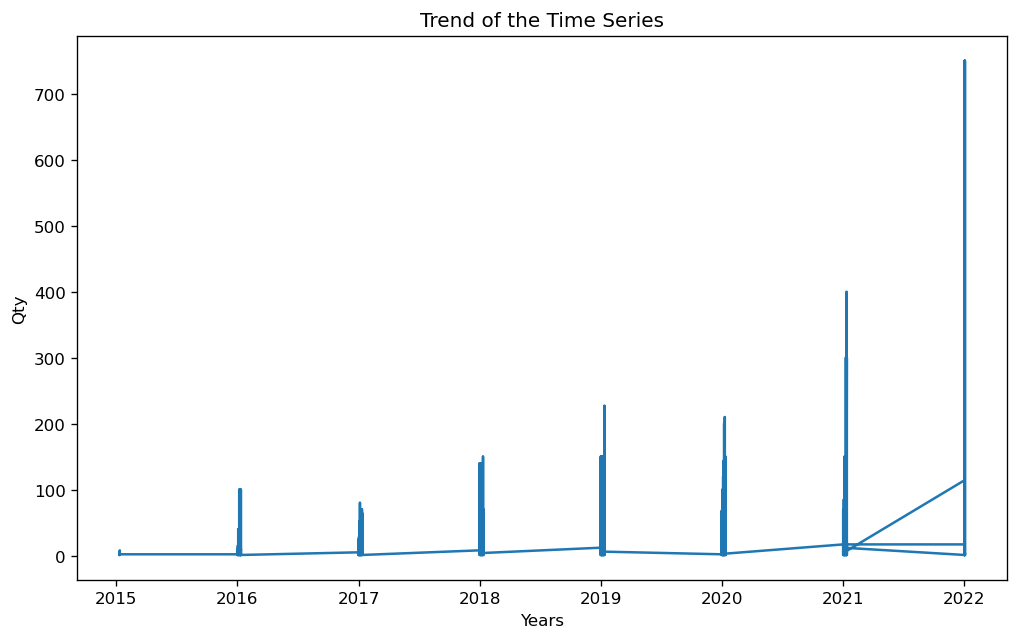

In [27]:
plt.figure(figsize= (10,6))
plt.plot(df)
plt.xlabel('Years')
plt.ylabel('Qty')
plt.title('Trend of the Time Series')

<AxesSubplot:title={'center':'Seasonality of the Time Series'}, xlabel='Month', ylabel='Qty'>

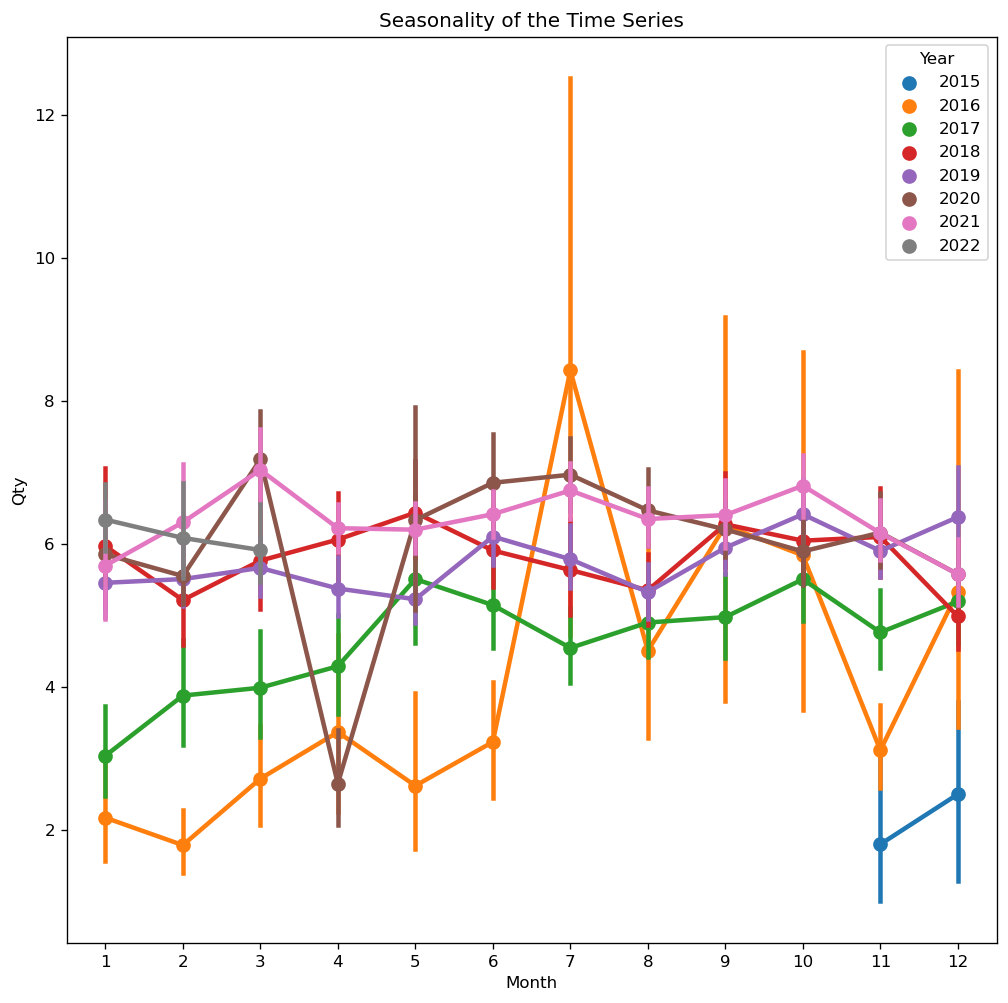

In [28]:
# To plot the seasonality we are going to create a temp dataframe and add columns for Month and Year values
df_temp = df.copy()
df_temp['Year'] = pd.DatetimeIndex(df_temp.index).year
df_temp['Month'] = pd.DatetimeIndex(df_temp.index).day
# Stacked line plot
plt.figure(figsize=(10,10))
plt.title('Seasonality of the Time Series')
sns.pointplot(x='Month',y='Qty',hue='Year',data=df_temp)

In [29]:
decomposition = sm.tsa.seasonal_decompose(df, model='additive') 
fig = decomposition.plot()

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [30]:
def stationarity_test(timeseries):
    # Get rolling statistics for window = 12 i.e. yearly statistics
    rolling_mean = timeseries.rolling(window = 12).mean()
    rolling_std = timeseries.rolling(window = 12).std()
    
    # Plot rolling statistic
    plt.figure(figsize= (10,6))
    plt.xlabel('Years')
    plt.ylabel('Qty')    
    plt.title('Stationary Test: Rolling Mean and Standard Deviation')
    plt.plot(timeseries, color= 'blue', label= 'Original')
    plt.plot(rolling_mean, color= 'green', label= 'Rolling Mean')
    plt.plot(rolling_std, color= 'red', label= 'Rolling Std')   
    plt.legend()
    plt.show()
    
    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    df_test = adfuller(timeseries)
    df_output = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        df_output['Critical Value (%s)' %key] = value
    print(df_output)

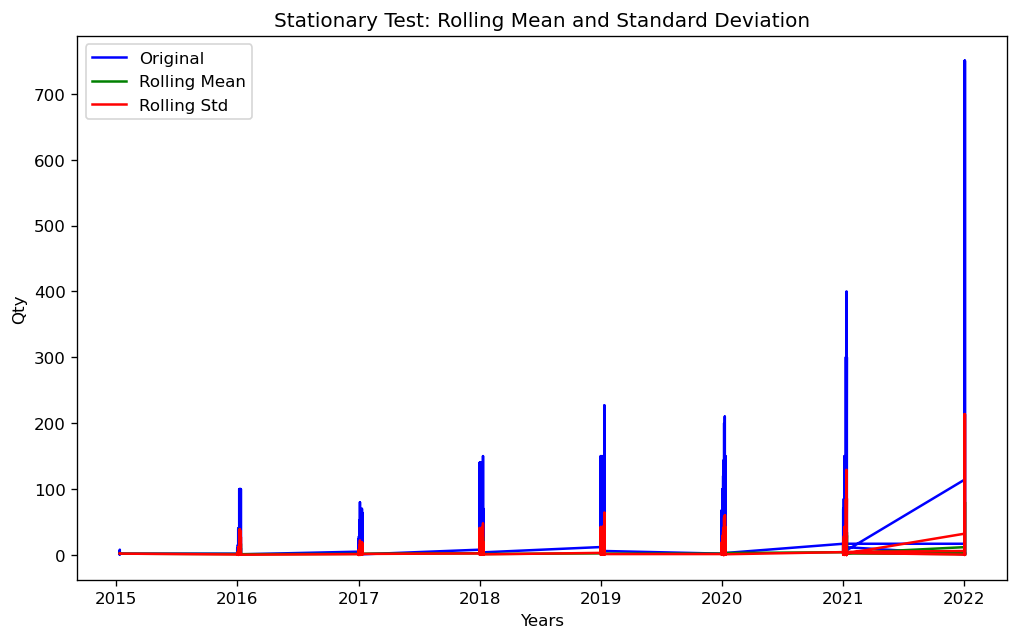

Results of Dickey-Fuller Test
Test Statistic                   -19.138290
p-value                            0.000000
#Lags Used                        62.000000
Number of Observations Used    68573.000000
Critical Value (1%)               -3.430445
Critical Value (5%)               -2.861582
Critical Value (10%)              -2.566792
dtype: float64


In [31]:
stationarity_test(df)

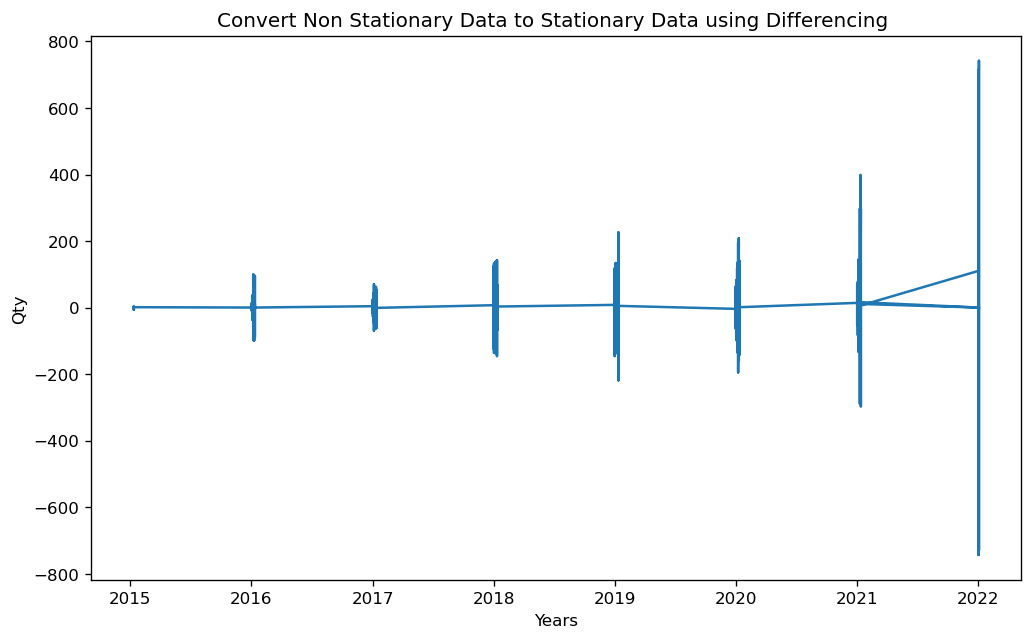

In [32]:
df_diff = df.diff(periods = 1) # First order differencing
plt.xlabel('Years')
plt.ylabel('Qty')    
plt.title('Convert Non Stationary Data to Stationary Data using Differencing ')
plt.plot(df_diff)

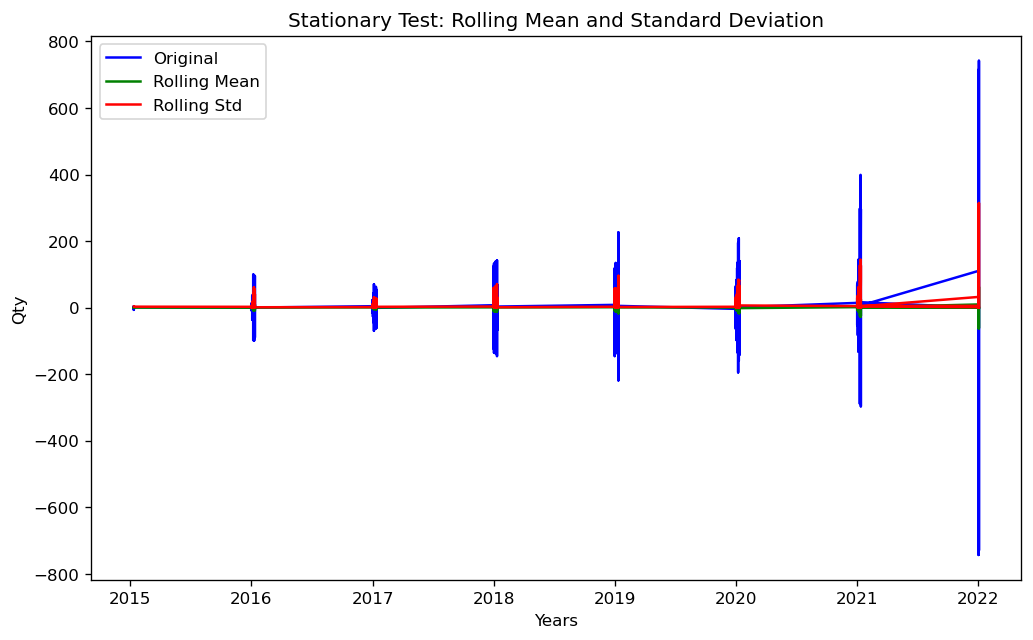

Results of Dickey-Fuller Test
Test Statistic                   -54.184255
p-value                            0.000000
#Lags Used                        62.000000
Number of Observations Used    68572.000000
Critical Value (1%)               -3.430445
Critical Value (5%)               -2.861582
Critical Value (10%)              -2.566792
dtype: float64


In [33]:
df_diff.dropna(inplace = True)# Data transformation may add na values
stationarity_test(df_diff)

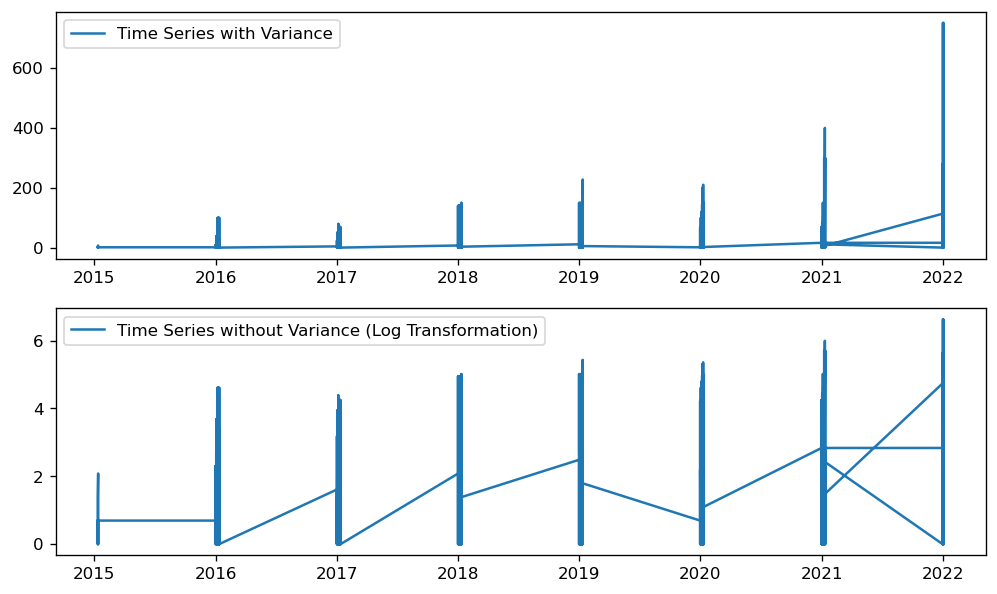

In [34]:
df_log = np.log(df)

plt.subplot(211)
plt.plot(df, label= 'Time Series with Variance')
plt.legend()
plt.subplot(212)
plt.plot(df_log, label='Time Series without Variance (Log Transformation)')
plt.legend()  
plt.show()

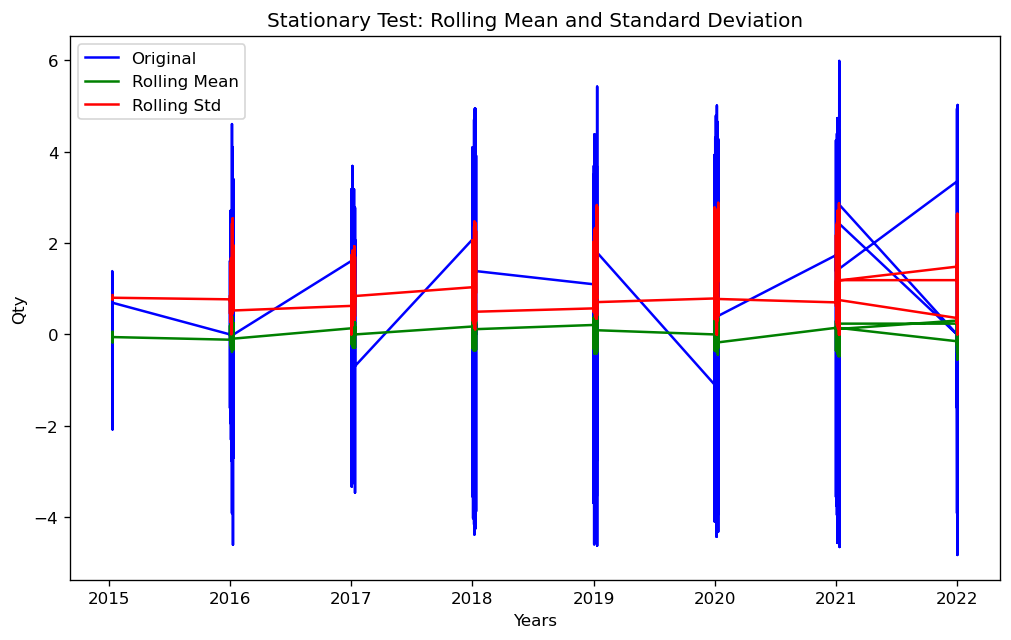

Results of Dickey-Fuller Test
Test Statistic                   -53.986577
p-value                            0.000000
#Lags Used                        62.000000
Number of Observations Used    68572.000000
Critical Value (1%)               -3.430445
Critical Value (5%)               -2.861582
Critical Value (10%)              -2.566792
dtype: float64


In [35]:
df_log_diff = df_log.diff(periods = 1) # First order differencing

df_log_diff.dropna(inplace = True)# Data transformation may add na values
stationarity_test(df_log_diff)

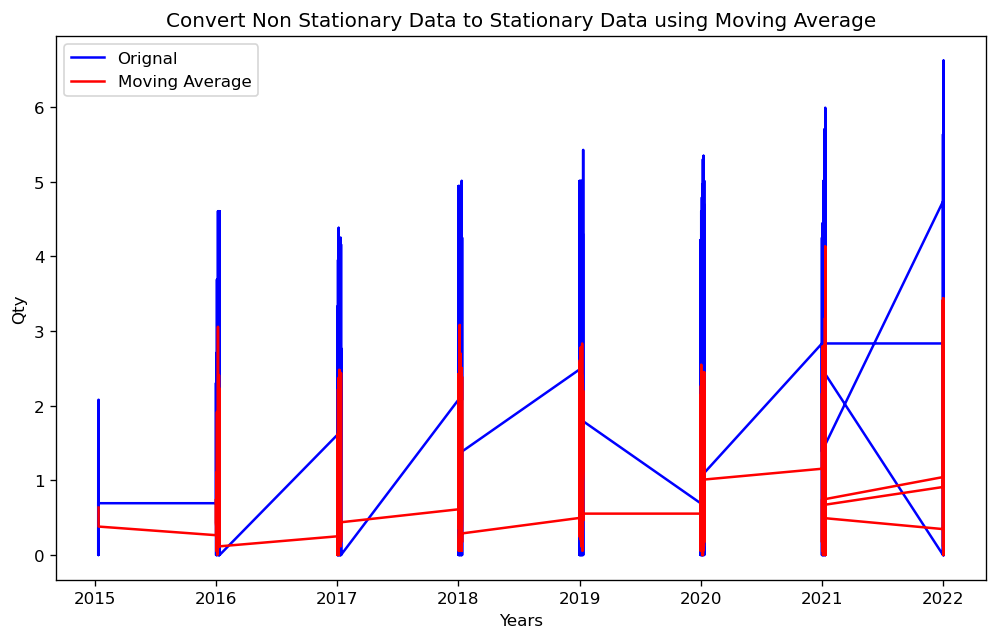

In [36]:
df_log_moving_avg = df_log.rolling(window = 12).mean()
plt.xlabel('Years')
plt.ylabel('Qty')    
plt.title('Convert Non Stationary Data to Stationary Data using Moving Average')
plt.plot(df_log, color= 'blue', label='Orignal')
plt.plot(df_log_moving_avg, color= 'red', label='Moving Average')
plt.legend()

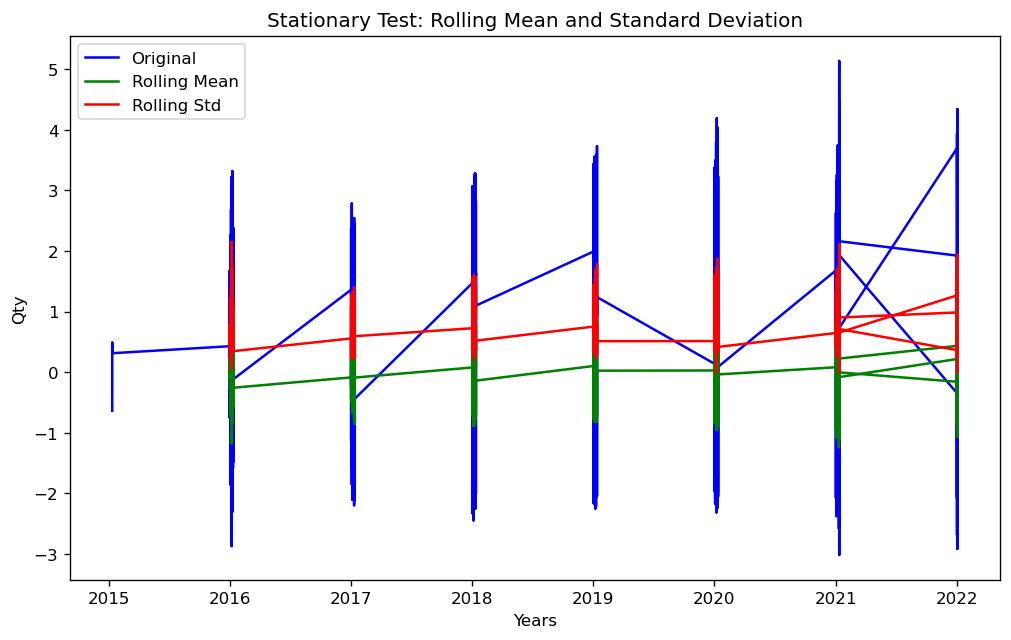

Results of Dickey-Fuller Test
Test Statistic                   -50.748130
p-value                            0.000000
#Lags Used                        62.000000
Number of Observations Used    68562.000000
Critical Value (1%)               -3.430445
Critical Value (5%)               -2.861582
Critical Value (10%)              -2.566792
dtype: float64


In [37]:
df_log_moving_avg_diff = df_log - df_log_moving_avg
df_log_moving_avg_diff.dropna(inplace = True)
stationarity_test(df_log_moving_avg_diff)